# Set up the environment
The software we will use includes:
- Gmsh -- https://gmsh.info: for defining our detector geometry and creating a finite element mesh
- Elmer -- http://www.elmerfem.org: for solving for the electrostatic fields
- ROOT -- https://root.cern.ch: a prerequisite for Garfield++ (with Python enabled). Note that for this example a version of ROOT has been compiled with Python 3.
- Garfield++ -- https://garfieldpp.web.cern.ch/garfieldpp: for detector simulation

The entire development environment has already been prepared to run the code in this notebook on Google Colab and will be downloaded directly below. This setup is documented in another notebook:

https://colab.research.google.com/github/jerenner/garfieldfem/blob/master/garfield_FEM_install.ipynb

It can be followed to perform a similar installation on a local machine.

**Get the pre-compiled binaries and setup environment**

In [1]:
!wget -q https://raw.githubusercontent.com/swieca22/swieca22/master/setup.py
import setup
setup.install_packages()

Unpacking...
Installing dependencies....
Welcome to JupyROOT 6.22/08


In [2]:
import ROOT
import ctypes

In [3]:
# Set up the gas medium.
gas = ROOT.Garfield.MediumMagboltz()
gas.SetTemperature(293.15)
gas.SetPressure(760.)
gas.SetComposition("ar", 90., "co2", 10.)
gas.EnableDrift()

MediumMagboltz::SetComposition:
    Ar/CO2 (90/10)


In [4]:
#Electric field [kV / cm].
field = 20. 
#Gas gap [cm]
gap = 0.1

#Make a drift volume.
box = ROOT.Garfield.SolidBox(0, 0, gap, 2, 2, gap)
geo = ROOT.Garfield.GeometrySimple()
geo.AddSolid(box, gas)

#Make a component with constant drift field.
cmp = ROOT.Garfield.ComponentConstant()
cmp.SetGeometry(geo)
cmp.SetElectricField(0, 0, field * 1.e3);

#Make a sensor.
sensor = ROOT.Garfield.Sensor()
sensor.AddComponent(cmp)

In [5]:
nBins = 50
hElectrons = ROOT.TH1I("hElectrons", "Number of electrons", nBins, -0.5, nBins - 0.5);

#Microscopic tracking.
aval = ROOT.Garfield.AvalancheMicroscopic()
aval.SetSensor(sensor)

ne = ctypes.c_int()
ni = ctypes.c_int()

nEvents = 50;
for j in range (0,nEvents):
  if (j % 10 == 0):
    print(j,"/",nEvents, end="\n")
  #Initial electron energy [eV].
  e0 = 1.;
  aval.AvalancheElectron(0, 0, gap, 0, e0, 0, 0, 0);
  aval.GetAvalancheSize(ne, ni);
  gain = ne.value
  print(gain)
  hElectrons.Fill(gain)

0 / 50
145
320
370
228
57
906
538
381
0
1641
10 / 50
161
259
316
232
468
1115
235
471
2721
808
20 / 50
711
1753
887
1498
0
1671
2663
142
235
29
30 / 50
496
130
344
1399
605
817
1053
721
1403
312
40 / 50
998
585
428
261
2735
2240
412
620
1771
474
Sensor::SetArea:
    -2 < x [cm] < 2
    -2 < y [cm] < 2
    0 < z [cm] < 0.2


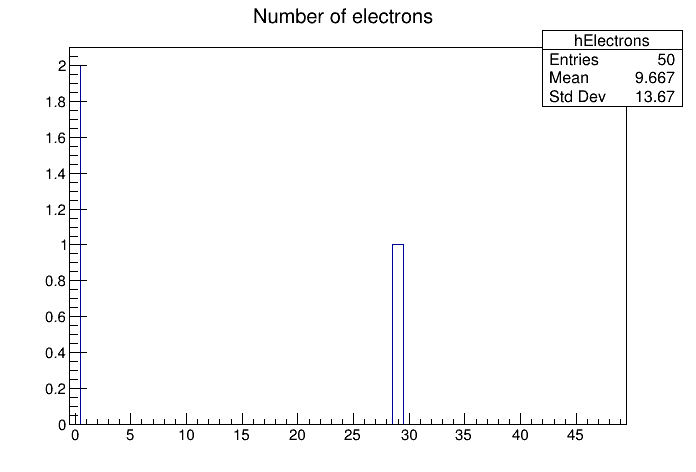

In [6]:
c = ROOT.TCanvas()
hElectrons.Draw("h")
c.Draw()